# K-Nearest Neighbors Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Setup

### Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### A simple visualization

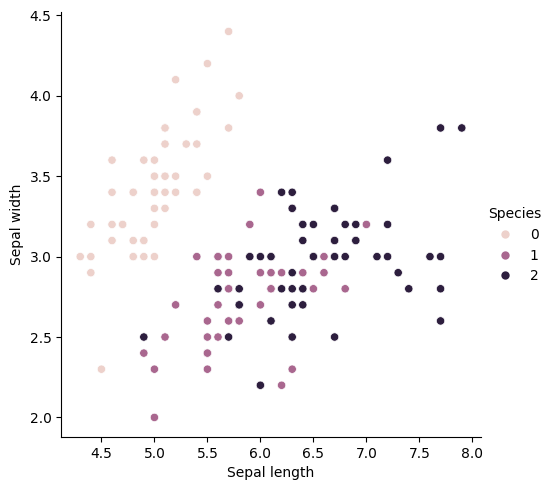

In [6]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:4]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
X_train[:5]

,Sepal length,Sepal width,Petal length,Petal width
68,6.2,2.2,4.5,1.5
97,6.2,2.9,4.3,1.3
79,5.7,2.6,3.5,1.0
67,5.8,2.7,4.1,1.0
94,5.6,2.7,4.2,1.3


### Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train[:5]

array([[ 0.35732024, -1.90959011,  0.36062536,  0.34568795],
       [ 0.35732024, -0.35677724,  0.24807649,  0.08396837],
       [-0.24490488, -1.02226847, -0.20211903, -0.30861101],
       [-0.12445986, -0.80043806,  0.13552761, -0.30861101],
       [-0.3653499 , -0.80043806,  0.19180205,  0.08396837]])

## K-Nearest Neighbors

In [11]:
k = 1

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
knn_model = classifier

In [14]:
# Example input data in JSON format
import json

# Function to predict using the KNN model
def make_prediction(data_json, classifier, scaler: StandardScaler):
    # Convert JSON string to Python dictionary
    data = json.loads(data_json)
    
    # Convert the input features to a numpy array
    data_array = np.array([list(data.values())])
    
    # Convert the numpy array to a pandas DataFrame
    data = pd.DataFrame(data_array, columns = data.keys())
    # Scale the data using the fitted scaler
    scaled_data = scaler.transform(data)
    
    # Get the prediction
    prediction = classifier.predict(scaled_data)[0]
    
    # Return the prediction
    return prediction

# Example input data in JSON format
input_data1 = '{"Sepal length": 5.3, "Sepal width": 3.7, "Petal length": 1.5, "Petal width": 0.2}'
input_data2 = '{"Sepal length": 4.5, "Sepal width": 2.3, "Petal length": 1.3, "Petal width": 0.3}'

# Create a response JSON
def create_response_json(input_data, prediction):
    response_json = json.dumps({"input": input_data, "prediction": int(prediction)})
    return response_json

# Now, use the model to predict for the first input data
prediction1 = make_prediction(input_data1, classifier,scaler)
response1 = create_response_json(input_data1, prediction1)

print(response1)

# Now, use the model to predict for the second input data:
prediction2 = make_prediction(input_data2, classifier,scaler)  
response2 = create_response_json(input_data2, prediction2)

response2

{"input": "{\"Sepal length\": 5.3, \"Sepal width\": 3.7, \"Petal length\": 1.5, \"Petal width\": 0.2}", "prediction": 0}


'{"input": "{\\"Sepal length\\": 4.5, \\"Sepal width\\": 2.3, \\"Petal length\\": 1.3, \\"Petal width\\": 0.3}", "prediction": 1}'

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  1  0]
 [ 0 11  0]
 [ 0  1  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.85      1.00      0.92        11
           2       1.00      0.86      0.92         7

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

Accuracy: 0.9333333333333333


## Best k

In [17]:
def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [18]:
knn_tuning(1)

0.9333333333333333

In [19]:
knn_tuning(5)

0.9666666666666667

In [20]:
knn_results = pd.DataFrame({'K':np.arange(1, len(X_train), 5)})

In [21]:
knn_results['K']

0       1
1       6
2      11
3      16
4      21
5      26
6      31
7      36
8      41
9      46
10     51
11     56
12     61
13     66
14     71
15     76
16     81
17     86
18     91
19     96
20    101
21    106
22    111
23    116
Name: K, dtype: int32

In [22]:
knn_results['Accuracy'] = knn_results['K'].apply(knn_tuning)
knn_results['Accuracy']

0     0.933333
1     0.966667
2     0.933333
3     0.966667
4     0.966667
5     0.933333
6     0.900000
7     0.900000
8     0.900000
9     0.866667
10    0.833333
11    0.800000
12    0.833333
13    0.833333
14    0.866667
15    0.866667
16    0.833333
17    0.866667
18    0.733333
19    0.600000
20    0.533333
21    0.500000
22    0.333333
23    0.233333
Name: Accuracy, dtype: float64

In [23]:
knn_results

,K,Accuracy
0,1,0.933333
1,6,0.966667
2,11,0.933333
3,16,0.966667
4,21,0.966667
5,26,0.933333
6,31,0.900000
7,36,0.900000
8,41,0.900000
9,46,0.866667


## Optimize weights

In [24]:
def knn_tuning_uniform(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [25]:
def knn_tuning_distance(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [26]:
knn_results['Uniform'] = knn_results['K'].apply(knn_tuning_uniform)
knn_results['Distance'] = knn_results['K'].apply(knn_tuning_distance)
knn_results

,K,Accuracy,Uniform,Distance
0,1,0.933333,0.933333,0.933333
1,6,0.966667,0.966667,0.933333
2,11,0.933333,0.933333,0.966667
3,16,0.966667,0.966667,0.966667
4,21,0.966667,0.966667,0.966667
5,26,0.933333,0.933333,0.966667
6,31,0.900000,0.900000,0.966667
7,36,0.900000,0.900000,0.966667
8,41,0.900000,0.900000,0.966667
9,46,0.866667,0.866667,0.966667
